# Deep Learning Fundamentals - LU02 Lab Exercise

## 2.1 Import required package and load data from file into pandas dataframe

In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import regularizers

# Import the data using the file path
data = pd.read_csv('Ames_Housing_Sales.csv', sep=',')
print('Data shape: {}'.format(data.shape))

Data shape: (1359, 80)


## 2.2 Data Preparation
Extract the label column containing the SalePrice and remove from the dataset

In [3]:
y_col_name = 'SalePrice'
y_data = data[y_col_name]

x_data = data.drop(y_col_name, axis=1)

Perform One-Hot Encoding on all categorical data columns

In [4]:
# OneHot Encode categorical data
categorical_data = x_data.select_dtypes(include=['object']).copy()
for col in categorical_data.columns:
    categorical_data[col] = categorical_data[col].astype('category')

categorical_data = pd.get_dummies(categorical_data)
print('Categorical data shape: {}'.format(categorical_data.shape))

Categorical data shape: (1359, 258)


Normalize data scales for numerical data and the labels

In [5]:
# Standard Scale numerial feature data
numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numerical_data.values #returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)

# Standard Scale numerial label data
y_tmp = pd.DataFrame(y_data).values #returns a numpy array
y_scaler = MinMaxScaler()
y_tmp = y_scaler.fit_transform(y_tmp)
y_tmp = y_tmp.reshape(-1)
y_data = pd.Series(y_tmp)

In [6]:
# Combine categorial and numerical data
x_data = pd.concat([numerical_data, categorical_data], axis=1)
print('x_data data shape: {}'.format(x_data.shape))

x_col_name = x_data.columns
x_col_count = len(x_col_name)

x_data data shape: (1359, 294)


## 2.3 Split the data

### Method 1

In [7]:
# Define the model
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print('X_train data shape: {}'.format(X_train.shape))
print('X_test data shape: {}'.format(X_test.shape))
print('X_val data shape: {}'.format(X_val.shape))

# Pass the validation data into the fit method directory
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

X_train data shape: (951, 294)
X_test data shape: (204, 294)
X_val data shape: (204, 294)
Epoch 1/20
119/119 [==============================] - 1s 2ms/step - loss: 0.0263 - mae: 0.1139 - val_loss: 0.0099 - val_mae: 0.0719
Epoch 2/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0592 - val_loss: 0.0064 - val_mae: 0.0572
Epoch 3/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0053 - mae: 0.0502 - val_loss: 0.0047 - val_mae: 0.0501
Epoch 4/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0438 - val_loss: 0.0037 - val_mae: 0.0439
Epoch 5/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0385 - val_loss: 0.0030 - val_mae: 0.0391
Epoch 6/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0347 - val_loss: 0.0026 - val_mae: 0.0366
Epoch 7/20
119/119 [==============================] - 0s 1ms/step - loss: 0.0027 - mae: 0.0318 - val_loss: 0.0022 - va

### Method 2

In [8]:
# Define the model
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4)

print('X_train data shape: {}'.format(X_train.shape))
print('X_test data shape: {}'.format(X_test.shape))

# Specify the validation split in the fit method
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

X_train data shape: (815, 294)
X_test data shape: (544, 294)
Epoch 1/20
82/82 [==============================] - 0s 2ms/step - loss: 0.0154 - mae: 0.0884 - val_loss: 0.0075 - val_mae: 0.0651
Epoch 2/20
82/82 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0523 - val_loss: 0.0048 - val_mae: 0.0520
Epoch 3/20
82/82 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0442 - val_loss: 0.0038 - val_mae: 0.0459
Epoch 4/20
82/82 [==============================] - 0s 1ms/step - loss: 0.0034 - mae: 0.0401 - val_loss: 0.0033 - val_mae: 0.0423
Epoch 5/20
82/82 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0370 - val_loss: 0.0026 - val_mae: 0.0384
Epoch 6/20
82/82 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0340 - val_loss: 0.0025 - val_mae: 0.0369
Epoch 7/20
82/82 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0327 - val_loss: 0.0027 - val_mae: 0.0378
Epoch 8/20
82/82 [===========

## 2.4 Build and train model

In [9]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

network = models.Sequential()

# This is 1 input layer of x_col_count nodes and 1 output later of 1 node
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))

# >>>>>>>>> the following set is a sample if to create multiple layer >>>>>>>>>>>>>
#example to create multiple layers. the following example is 
# 1 input layer of x_col_count nodes 
# 2 hidden layers of 5 and 3 nodes respectively
# 1 output layer of 1 node on predicted sales pricing
#network.add(layers.Dense(3, activation='relu', input_shape=(x_col_count,)))
#network.add(layers.Dense(1, activation='sigmoid'))
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Observe the use loss function in the codes below
#network.compile(optimizer='sgd',
#                loss='mean_squared_error',
#               metrics=['mse'])

# Observe the setting of shuffle to True
# Play around the epochs, batch_size to see the effect 
# (Try to achieve <0.001 loss)
nr.seed(9898)

network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Plot loss and accuracy graph
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0903 - val_loss: 0.0046 - val_mae: 0.0486
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0060 - mae: 0.0503 - val_loss: 0.0031 - val_mae: 0.0423
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0443 - val_loss: 0.0024 - val_mae: 0.0377
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0404 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 5/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0367 - val_loss: 0.0019 - val_mae: 0.0330
Epoch 6/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0346 - val_loss: 0.0017 - val_mae: 0.0304
Epoch 7/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0319 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.03

## 2.5 Evaluate the model

In [10]:
test_loss, test_mae = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test mae: {:.4f}'.format(test_mae))

13/13 [==============================] - 0s 1ms/step - loss: 0.0023 - mae: 0.0275
Test loss: 0.0023
Test mae: 0.0275


## 2.5.1 Add the codes for plotting the graph to visualise the evaluation. 
Note: You will need to amend the fit to support the plotting

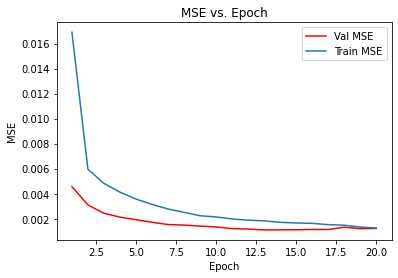

In [11]:
import matplotlib.pyplot as plt
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Val MSE')
    plt.plot(x, train_loss, label = 'Train MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE vs. Epoch')
    plt.legend()
    
plot_loss(history)  

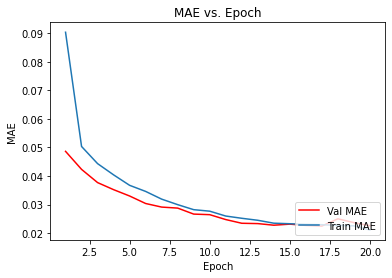

In [12]:
def plot_mse(history):
    train_acc = history.history['mae']
    test_acc = history.history['val_mae']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Val MAE')
    plt.plot(x, train_acc, label = 'Train MAE')  
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs. Epoch')  
    plt.legend(loc='lower right')

plot_mse(history)

## 2.6 Perform a prediction

In [13]:
predictData = pd.read_csv('PredictTest.csv')

In [14]:
predictDataCat = pd.get_dummies(predictData.select_dtypes(include=['object']).copy())
for col in categorical_data.columns:
    if col not in predictDataCat.columns:
        print("Adding missing feature {}".format(col))
        predictDataCat[col] = 0
        
print(predictDataCat.shape)

Adding missing feature Alley_Grvl
Adding missing feature BldgType_2fmCon
Adding missing feature BldgType_Duplex
Adding missing feature BldgType_Twnhs
Adding missing feature BsmtCond_Fa
Adding missing feature BsmtFinType2_ALQ
Adding missing feature BsmtFinType2_BLQ
Adding missing feature BsmtFinType2_GLQ
Adding missing feature BsmtQual_Fa
Adding missing feature Condition1_Feedr
Adding missing feature Condition1_PosA
Adding missing feature Condition1_PosN
Adding missing feature Condition1_RRAe
Adding missing feature Condition1_RRAn
Adding missing feature Condition1_RRNe
Adding missing feature Condition1_RRNn
Adding missing feature Condition2_Artery
Adding missing feature Condition2_Feedr
Adding missing feature Condition2_PosA
Adding missing feature Condition2_PosN
Adding missing feature Condition2_RRAe
Adding missing feature Condition2_RRAn
Adding missing feature Condition2_RRNn
Adding missing feature Electrical_FuseP
Adding missing feature Electrical_Mix
Adding missing feature ExterCond

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [15]:
# Standard Scale numerial feature data
numericData = predictData.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numericData.values # Returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numericData = pd.DataFrame(data_tmp, columns=numericData.columns)
print(numericData)

    1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0   2.186679 -0.704939   4.358899     -0.904534    2.304486   -0.430482   
1   0.046885 -0.704939  -0.229416     -0.904534    0.445439   -0.430482   
2  -0.555701  0.995354  -0.229416      0.603023   -0.274437   -0.003686   
3   0.621801  1.151732  -0.229416      0.603023   -1.070089   -0.430482   
4  -1.145989 -0.704939  -0.229416     -2.412091    0.690449   -0.430482   
5  -0.598743  1.730080  -0.229416      0.603023    0.862209   -0.430482   
6  -0.826249 -0.704939  -0.229416     -0.904534   -1.070089   -0.430482   
7   0.618726 -0.704939  -0.229416      0.603023   -1.070089   -0.430482   
8  -0.946152 -0.704939  -0.229416      0.603023   -0.597749    2.002255   
9  -0.100687 -0.704939  -0.229416      0.603023    0.427758   -0.430482   
10 -0.002306  1.454558  -0.229416      0.603023    1.655335   -0.430482   
11 -1.305859  0.660260  -0.229416     -0.904534   -1.070089   -0.430482   
12  1.098335 -0.704939  -

In [16]:
predictDataFinal = pd.concat([numericData, predictDataCat], axis=1)
print('Predict data final shape: {}'.format(predictDataFinal.shape))

Predict data final shape: (20, 294)


In [17]:
result = network.predict(predictDataFinal)
result = y_scaler.inverse_transform(result)
print(result)

1/1 [==============================] - 0s 62ms/step
[[271945.56 ]
 [111734.086]
 [197011.03 ]
 [336244.16 ]
 [136321.94 ]
 [308384.66 ]
 [159660.92 ]
 [261862.1  ]
 [136014.62 ]
 [127326.48 ]
 [267854.94 ]
 [224221.84 ]
 [362320.47 ]
 [146006.05 ]
 [185724.97 ]
 [248407.88 ]
 [134913.53 ]
 [279698.47 ]
 [122113.83 ]
 [216796.67 ]]


In [18]:
dir(network)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [20]:
network.weights

[<tf.Variable 'dense_2/kernel:0' shape=(294, 1) dtype=float32, numpy=
 array([[-0.03414702],
        [ 0.01442533],
        [ 0.01900642],
        [-0.01135246],
        [-0.01823618],
        [ 0.01107969],
        [ 0.04903196],
        [ 0.02251063],
        [ 0.00372783],
        [ 0.01088816],
        [-0.00295071],
        [ 0.06887724],
        [ 0.0200751 ],
        [ 0.05483748],
        [-0.05801459],
        [ 0.10308452],
        [ 0.03155214],
        [-0.05563816],
        [ 0.03630697],
        [-0.01666955],
        [ 0.00260653],
        [-0.01665299],
        [ 0.0313839 ],
        [ 0.01937352],
        [ 0.00593704],
        [-0.00475255],
        [ 0.07101125],
        [ 0.125204  ],
        [ 0.00295833],
        [ 0.01876202],
        [ 0.06132696],
        [ 0.03927292],
        [ 0.0281894 ],
        [ 0.09419944],
        [-0.00806894],
        [-0.00921244],
        [-0.12072087],
        [-0.05715486],
        [ 0.04631723],
        [-0.02131969],
        [-